## Approach

I have taken following approach to solve this problem (alternative approaches are possible)
1. Dependent or outcome variable is Personal Loan (values 0 or 1)
2. All variables are numeric, so decide which are continious and which are categorical by number of unique values and observation
3. Treat any unusual values (0 or negative) if necessary and appropriate
4. For continious variables do univariate analysis by dist plots
5. For categorical variables do univariate analysis by value counts
6. Bivariate - To decide if a continious variable impacts outcome, use correlation heatmap and groupby (against outcome) stats
7. Bivariate - To decide if a categorical variable impacts outcome, use crosstab function against outcome variable
8. Remove any non-impacting variables from the model
9. Run and evalaute the model. Predict for a random input from Test set
10. Improve the model by changing hyperparameters and select the best
For selecting the best model I am primarily using model test_score (it should be highest possible) and then checking that the other
attributes are acceptable. If there is a trade-off between recall and precision then I would go for precison because from banking
business perspective avoiding FPs (where you would incorrectly approve a loan) is more important than avoding FNs (where you would 
    deny a loan)
11. Explain the coefficients and p values for the final model
12. Conclusion and business insights

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
#more librariries related to regression will be imported as and when later

## Load and review data

In [2]:
pdata = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

In [4]:
pdata.head() # To check first 5 rows of data set

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
#check null values
pdata.isnull().sum()
#output shows there are no null values. Also no missing values (all attribute counts are 5000)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
pdata.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

This shows us that the following should be treated as categorical variables:
    Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard

In [9]:
pdata[pdata["Mortgage"]==0].count() #count of rows where mortgage = 0
# we are just checking the count here, 0 value is valid so we shall not treat it

ID                    3462
Age                   3462
Experience            3462
Income                3462
ZIP Code              3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [10]:
pdata[pdata["CCAvg"]==0].count()
# we are just checking the count here, 0 value is valid so we shall not treat it

ID                    106
Age                   106
Experience            106
Income                106
ZIP Code              106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

In [11]:
pdata[(pdata["CCAvg"] >0) & (pdata["CreditCard"] == 0)].count()
#The problem statement says that CreditCard field is for credit card issued by the bank whereas CCAvg is the average spend on any
#credit cards so there is no relation between them. This command is just to validate that assumption. A non-zero count would
#CCAvg is set even for those who do not have bank issued credit card

ID                    3452
Age                   3452
Experience            3452
Income                3452
ZIP Code              3452
Family                3452
CCAvg                 3452
Education             3452
Mortgage              3452
Personal Loan         3452
Securities Account    3452
CD Account            3452
Online                3452
CreditCard            3452
dtype: int64

In [12]:
pdata[pdata["Experience"]<0].count()
#describe showed us that experience minimum is below 0, which means there are negative values
# We shall decide later what to do with these 52 values or this column

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [13]:
#pdata.loc[:,'Personal Loan':'CreditCard'].sum()

Use value counts for univariate analysis of categorical variables

In [14]:
for i in ["Personal Loan","Securities Account", "CD Account", "Online","CreditCard", "Family", "Education"]:   # checking value counts of all object type columns
    print(pdata[i].value_counts(normalize=True))
    #print()

0    0.904
1    0.096
Name: Personal Loan, dtype: float64
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
1    0.5968
0    0.4032
Name: Online, dtype: float64
0    0.706
1    0.294
Name: CreditCard, dtype: float64
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


In [15]:
for i in ["Personal Loan","Securities Account", "CD Account", "Online","CreditCard", "Family", "Education"]:   # checking value counts of all object type columns
    print(pdata[i].value_counts())

0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


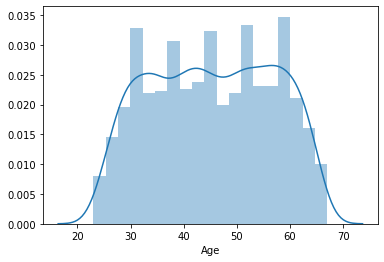

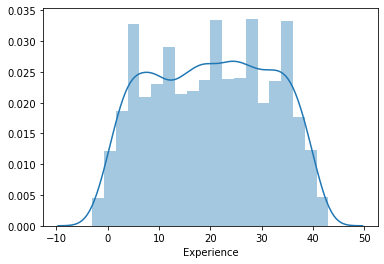

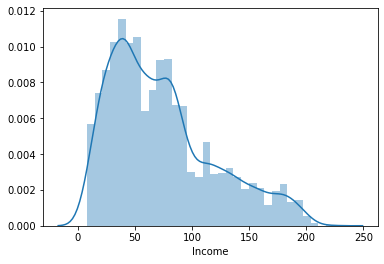

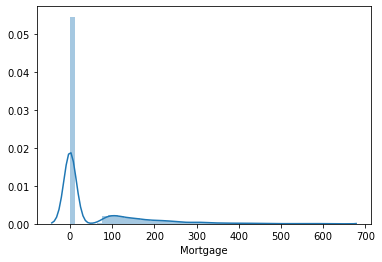

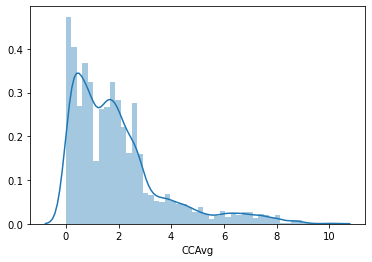

In [16]:
pdata.drop('ID', axis=1, inplace=True) #drop ID column

# distplot for continous columns
for i in ['Age','Experience','Income','Mortgage', 'CCAvg']:
    sns.distplot(pdata[i])
    plt.show()

The plots and the info from Describe command shows us that Age and Experience are normally distributed (mean appox = median) and
show very similar curve, indicating strong correlation. We shall verify it through corr heatmap
Income, mortgage and CCAvg are right skewed (median < mean)

## Identify Correlation in data 

In [17]:
#For bivariate analylis we can check the corelation between independent variables and also between independent variables and outcome variable
pdata.corr() # It will show correlation matrix 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [18]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


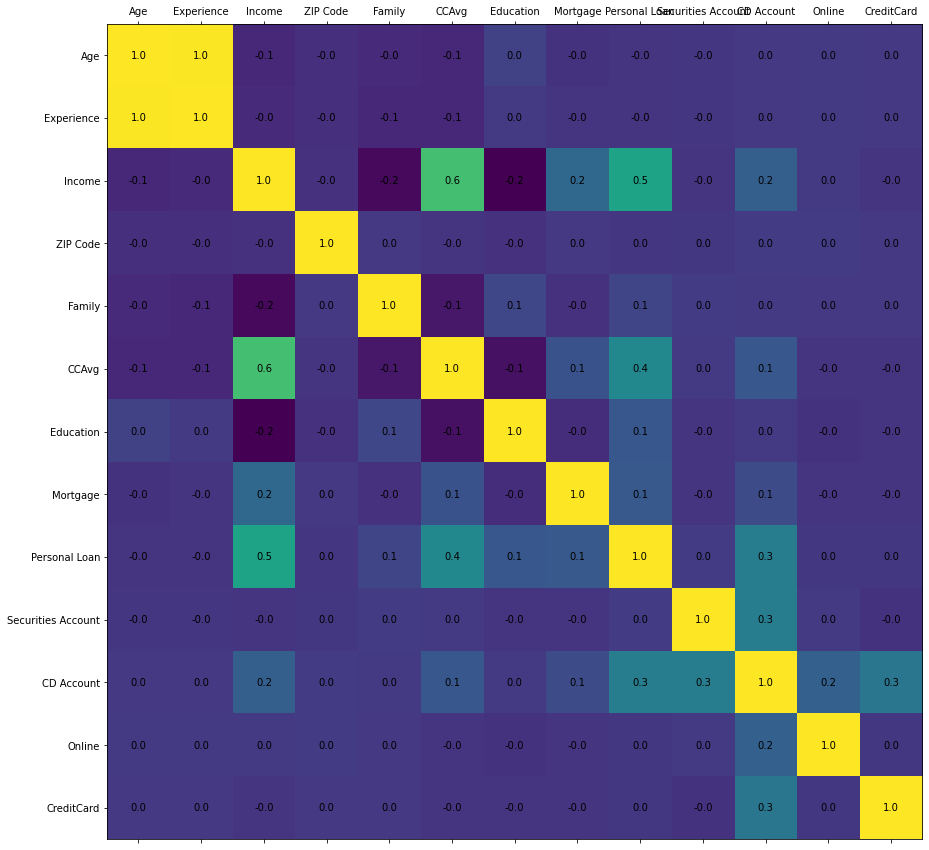

In [19]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see the following:
    1. Only Income and CCAvg show good corelation to outcome variable (personal loan) and some weak corelation shown by CD Account
    2. No corelation shown by any other variables, zipcode can certainly be dropped
    3. Age and Experience show very strong postive corelation, which means we can use only one of them in the model. 
    Given Experience has 52 bad values, we may drop it
    
        
    After groupby and crosstab analysis, which we must consider in addition to corr,  we can cofirm which to drop

In [20]:
#use output of this for decison on continious variables
pdata.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [21]:
# For Age and Experience, there is hardly any difference in the mean. However Income, CCAvg and Mortgage show siginificantly
#higher mean for personal status = 1

In [22]:
#use output of this for decison on continious variables
pdata.groupby(["Personal Loan"]).median()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.0,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.0,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# For Age and Experience, there is no difference in the median. Income and CCAvg show siginificantly
#higher median for personal status = 1. Mortgage has no difference in median value but we had seen that 
#it has significantly higher mean so should be retained in the model

In [24]:
#Now do crosstab analysis for categorical variables

In [25]:
pd.crosstab(pdata['CreditCard'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [26]:
#The above shows 9.5% with no credit cards have loan and only 9.7% with credit card have loans, so having a creditcard has
#no impact on loan status so can be dropped

In [27]:
pd.crosstab(pdata['Online'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [28]:
#similarly, being online also does not seem to have much impact so can be dropped

In [29]:
pd.crosstab(pdata['CD Account'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [30]:
#CD Account shows marked diffwerence as only 7% without it have loan, whereas 46% with it have loan so having a CD
#account does increase chance of having loan so CD Account should be retained

In [31]:
pd.crosstab(pdata['Securities Account'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [32]:
#9% without securities account have loans and only 11% with it have loans so not much impact, given the variable also showed almost
#zero correlation with outcome, it can be dropped

In [33]:
pd.crosstab(pdata['Family'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [34]:
# There is a steady increase in loan uptake with increasing size of family, with almost 11% of customers with size 4
#seem to be taking loans. The attribute should be retained for modelling

In [35]:
pd.crosstab(pdata['Education'],pdata['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [36]:
#Similar to Family, increase in Education seems to increase loan uptake, so should be retained

In [37]:
# Overall, based on the analysis we trim our modelling dataframe as below
#create another df pdata_model for mocdelling purpose so that we can still use pdata to validate some of the changes
pdata_model = pdata.drop(['Age','CreditCard','Experience', 'Online','Securities Account','ZIP Code'], axis=1)
pdata_model.head()


,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


## Calculate ratio of True/False from outcome variable 

In [38]:
n_true = len(pdata_model.loc[pdata_model['Personal Loan'] == True])
n_false = len(pdata_model.loc[pdata_model['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.6% people in current data set who havetaken personal loan and rest of 90.40% havent. 

Its a good distribution True/False cases in data.

# Data Preparation

### Check hidden missing values 

We checked missing values earlier but haven't got any. We have got some zeroes but they are valid.

In [39]:
pdata_model.head(10)

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0
5,29,4,0.4,2,155,0,0
6,72,2,1.5,2,0,0,0
7,22,1,0.3,3,0,0,0
8,81,3,0.6,2,104,0,0
9,180,1,8.9,3,0,1,0


## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [40]:
from sklearn.model_selection import train_test_split

X = pdata_model.drop('Personal Loan',axis=1)     # Predictor feature columns 
Y = pdata_model['Personal Loan']   # Predicted class (1=True, 0=False) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Income,Family,CCAvg,Education,Mortgage,CD Account
1334,35,2,1.3,1,0,0
4768,39,1,2.0,2,0,0
65,131,1,3.8,1,0,0
177,65,4,1.8,2,244,0
4489,21,3,0.2,2,0,0


Lets check split of data

In [41]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata_model.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata_model.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check True/False ratio in split data 

In [42]:
print("Original Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata_model.loc[pdata_model['Personal Loan'] == 1]), (len(pdata_model.loc[pdata_model['Personal Loan'] == 1])/len(pdata_model.index)) * 100))
print("Original Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata_model.loc[pdata_model['Personal Loan'] == 0]), (len(pdata_model.loc[pdata_model['Personal Loan'] == 0])/len(pdata_model.index)) * 100))
print("")
print("Training Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Loan True Values    : 480 (9.60%)
Original Loan False Values   : 4520 (90.40%)

Training Loan True Values    : 331 (9.46%)
Training Loan False Values   : 3169 (90.54%)

Test Loan True Values        : 149 (9.93%)
Test Loan False Values       : 1351 (90.07%)



In [43]:
# We have a good split of values in Train and Test, which is reasonably aligned to split in real data

# Logistic Regression

In [44]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(random_state=7) #(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5  intercept
0  0.052904  0.711478  0.154615  1.670346  0.00081  2.198486 -13.835332


In [45]:
#help(LogisticRegression) 

In [46]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9446666666666667


In [47]:
#This is a good score, we shall try to maximise it when we try to improve the model

In [48]:
#Predict a particular value using model
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
print(z.head(10))
#get predited value for row where income =114
z.loc[z['Income'] == 114]

      Income  Family  CCAvg  Education  Mortgage  CD Account  \
2764      84       1    2.9          3       105           0   
4767      45       3    0.9          1       101           0   
3814      35       3    1.3          1         0           0   
3499     114       1    0.3          1       286           0   
2735      70       3    2.6          2       165           0   
3922      20       4    1.5          2         0           0   
2701      55       1    1.6          2         0           0   
1179      98       3    1.2          3         0           0   
932      112       3    1.8          2         0           1   
792       98       1    4.0          3         0           0   

      Observed Loan Status  Predicted Loan Status  
2764                     0                      0  
4767                     0                      0  
3814                     0                      0  
3499                     0                      0  
2735                     0         

,Income,Family,CCAvg,Education,Mortgage,CD Account,Observed Loan Status,Predicted Loan Status
3499,114,1,0.3,1,286,0,0,0
3420,114,1,0.8,3,0,0,0,0
1098,114,1,0.0,1,0,0,0,0
1961,114,1,4.9,1,0,0,0,0
1986,114,2,0.4,1,0,0,0,0
12,114,2,3.8,3,0,0,0,0
2874,114,1,2.5,3,0,0,1,0
3053,114,2,0.2,1,0,0,0,0


In [49]:
#Just looking at the abvoce random example, the model seems to have predicted correctly for 7 out of 8 cases (87.5%)

In [50]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
#from sklearn.linear_model import LogisticRegression


In [51]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()
    
#draw_cm(y_test,y_predict)
    

Trainig accuracy 0.9462857142857143

Testing accuracy 0.9446666666666667

Confusion Matrix


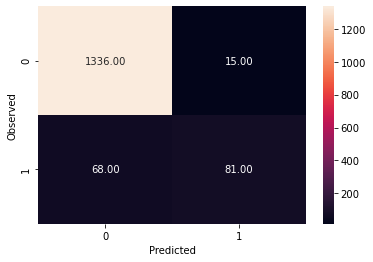

None

Recall: 0.5436241610738255

Precision: 0.84375

F1 Score: 0.6612244897959184

Roc Auc Score: 0.7662606371616352


In [52]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

The confusion matrix

True Positives (TP): we correctly predicted that they get loan 81

True Negatives (TN): we correctly predicted that they don't get loan 1336

False Positives (FP): we incorrectly predicted that they would get loan (a "Type I error") 15 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they won't get loan (a "Type II error") 68 Falsely predict negative Type II error

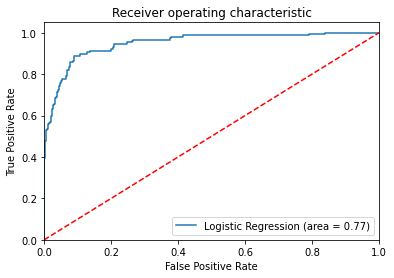

In [53]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [54]:
#Recall is a bit less but Precision is good, other scores also good, let us see if we can improve this further by
#improving model_test_score

In [55]:
# Checking Parameters of logistic regression
model.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.946, 0.946, 0.946, 0.905, 0.905]

[0.945, 0.945, 0.945, 0.901, 0.901]


C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [57]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


['liblinear', 'saga']

[0.947, 0.905]

[0.945, 0.901]


In [58]:
#Highest testing and training accuracy seem to be given by liblinear l1 combination so let us use that

In [59]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear') 
# no class wight added (default None), as adding class weight = balanced is actually reducing the score
model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Trainig accuracy 0.9465714285714286

Testing accuracy 0.9453333333333334


In [60]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.903, 0.947, 0.947, 0.947, 0.947, 0.947]

[0.899, 0.945, 0.948, 0.945, 0.945, 0.945]


In [61]:
#Final model
#c=0.25 shows highest testing score, so will go with that, also weight should be default (not balanced)
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.25) 
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)

Trainig accuracy 0.9465714285714286

Testing accuracy 0.948

Confusion Matrix


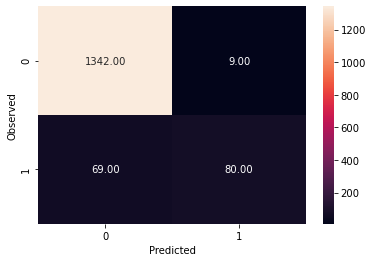

None

Recall: 0.5369127516778524

Precision: 0.898876404494382

F1 Score: 0.6722689075630252

Roc Auc Score: 0.7651255098137597


In [62]:
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Notice that this model is improved upon earlier one. Although Recall has slightly decreased (from 0.544 to 0.537), precision is 
increased from 0.843 to 0.899. F1 score has slightly improved and ROC has stayed the same. Also testing accuracy is increased
from 0.944 to 0.948
The confusion matrix

True Positives (TP): we correctly predicted that they get loan 80

True Negatives (TN): we correctly predicted that they don't get loan 1342

False Positives (FP): we incorrectly predicted that they would get loan (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they won't get loan (a "Type II error") 69 Falsely predict negative Type II error

From Business perspective the cost of type 1 error (predicting that they would get a loan when they shouldn't) is higher than cost of type II error so this model is better than earlier one as FPs are reduced

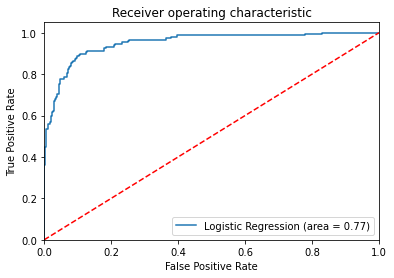

In [63]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


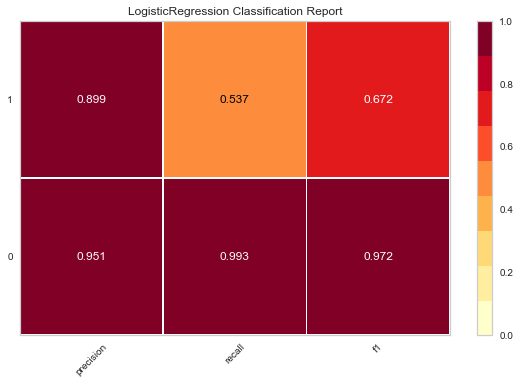

C:\Users\ddaml\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


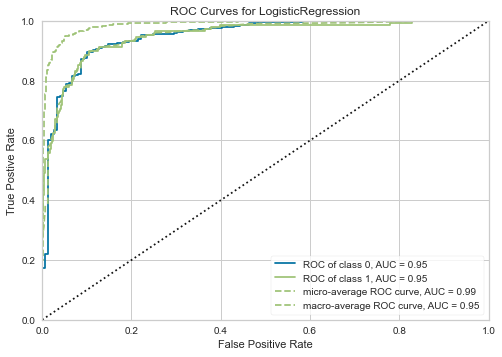

In [65]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

In [66]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.130192
         Iterations 9


In [67]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3493
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Sep 2020   Pseudo R-squ.:                  0.5840
Time:                        12:31:46   Log-Likelihood:                -455.67
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.859e-273
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0717      0.684    -20.568      0.000     -15.413     -12.731
Income         0.0537      0.003     17.438      0.000       0.048       0.060
Family         0.7220      0.090      8.046      0.0

In [68]:
#pvalue analysis shows that everything except Mortgage seem to have significant impact on the outcome (p<0.05))
# I have deliberately kept mortgage in the model as customers with loan have significantly higher mean mortgage balance
#, also from business perspective mortgage customers are more likely to take loan for home improvements etc#

In [69]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [70]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,2.36,10.61,0.91,0.00
Education,1.71,5.55,0.85,0.00
Family,0.72,2.06,0.67,0.00
CCAvg,0.16,1.17,0.54,0.00
Income,0.05,1.06,0.51,0.00
const,-14.07,0.00,0.00,0.00


#COEFFICIENT ANALYSIS
The above table shows:
    CD account has maximum coefficient and therefore the impact, with those with CD Accunt there is 91% probaility of accepting
    loan.
    
    With every unit increase in education the odds of getting the loan improve 5.55:1
        
    With every unti increase in Family size, odds to get the loan improve 2.06 times.
    
    And so on, with Income showing the least coeeficient but it is a continuous variable so it has smaller unit increases.
    
    ALL THE VARIABLE IN ABOVE TABLE HAVE pval of < 0.05, so statistically significant
        

In [71]:
#Predict a particular value using model
# Observe the predicted and observed classes in a dataframe.

z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
#print(z.head(10))
#get predited value for row where income =114
z.loc[z['Income'] == 114]

,Income,Family,CCAvg,Education,Mortgage,CD Account,Observed Loan Status,Predicted Loan Status
3499,114,1,0.30,1,286,0,0,0
3420,114,1,0.80,3,0,0,0,0
1098,114,1,0.00,1,0,0,0,0
1961,114,1,4.90,1,0,0,0,0
1986,114,2,0.40,1,0,0,0,0
12,114,2,3.80,3,0,0,0,0
2874,114,1,2.50,3,0,0,1,0
3053,114,2,0.20,1,0,0,0,0


CONCLUSION AND BUSINESS INSIGHTS

For a better targetted campaign to improve loan uptake, Thera bank needs to pay special attention to following attributes
of their liability customers:
    - If they have CD account (having one is better)
    - If they have higher education (higher the better)
    - If they have large families (larger the better)
    -If they have higher spend on credit cards (higher the better)
    - If they have high income (higher the better)
    Optionally they can consider if they have mortgage. I am saying optionally here because p value analysis says Mortgage
    balance is not statistically significant but is significant from banking business perspective, as mortgage customers can
    often require personal loans for home improvement etc
    
    In any model, in addtion to improving accuracy, focus should be on imprvoving precision and reducing False Positives.
    Targetting a customer who is not eligible for a loan is far riskier and cost;ier than denying it to someone who may be 
    apprvoed (False negatives)